This is a classification task: We have a set of data that we want to use to calculate a binary outcome. Regression is used to predict continuous variables

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [10]:
from matplotlib import rcParams 
rcParams['figure.figsize'] = 15, 5 
sns.set_style('darkgrid')
pd.options.display.float_format = "{:,.4f}".format

## Step 1
---

In [11]:
heart_data = pd.read_csv('data.csv') 
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6000,2,0,2,1


In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
heart_data.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [8]:
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


From this we can see that there are 303 total observations or rows in this dataset. It contains no missing values. As we can see from heart_data.nunique() there are 41 unique values for age, 2 for sex, 4 for cp, 49 for trtbps, 152 for chol, 2 for fbs, 3 for restecg, 91 for thalachh, 2 for exng, 40 for oldpeak, 3 for slp, 5 for caa, 4 for thall, and 2 for output. I will take sex, chest pain type, fasting blood sugar, resting ecg, exercise induced angia, slope, caa, thall, and output as categorical data because all the data takes 5 or fewer distinct values for these variables

## Step 2
---

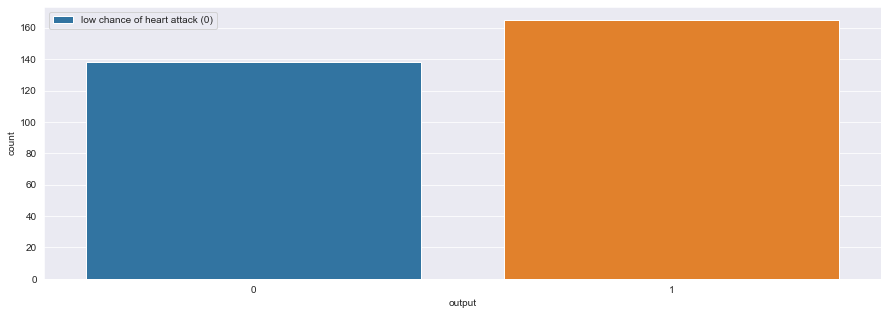

In [42]:
sns.countplot(x=heart_data['output'])
risk = ['low chance of heart attack (0)', 'high chance of heart attack (1)']
plt.legend(risk)

The dataset is relatively balanced. The difference in outcomes is only about 20 out of 300 which would not make for a significant change in our model. Working with balanced data is crucial for modeling, without balance you cannot draw proper outcomes from data. Certain groups or attribute may be under or over represented thus swaying the data and invalidating your analysis.<br>
You can deal with unbalanced data in many ways. You can take the unbalanced data as is and use models and algorithms that are more resistant to outliers and skewed data. This can take some trial and error. You should also use performance metrics when working with these sets, like the confusion matrix or F1 score. Another good technique is resampling or oversampling which you can do with scikit

## Step 3
---

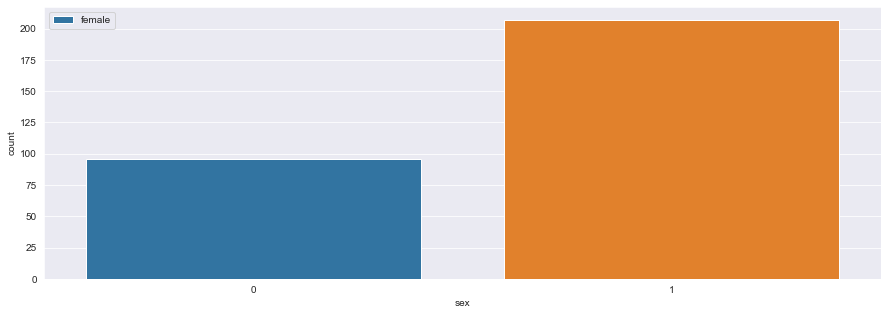

In [73]:
ax = sns.countplot(x=heart_data['sex'])
plt.legend({'female':0, 'male':1})
#Legend isn't working it only shows 1 label and I don't know why: the documentation is garbage

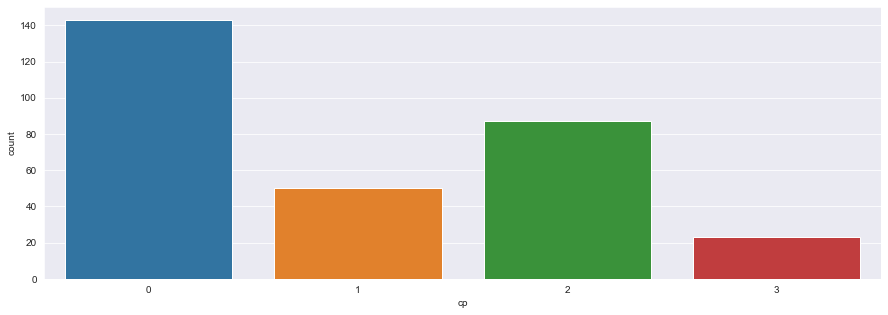

In [75]:
ax = sns.countplot(x=heart_data['cp'])

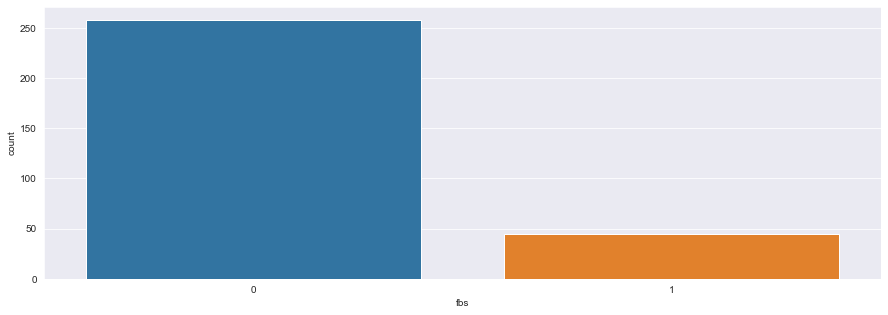

In [76]:
ax = sns.countplot(x=heart_data['fbs'])

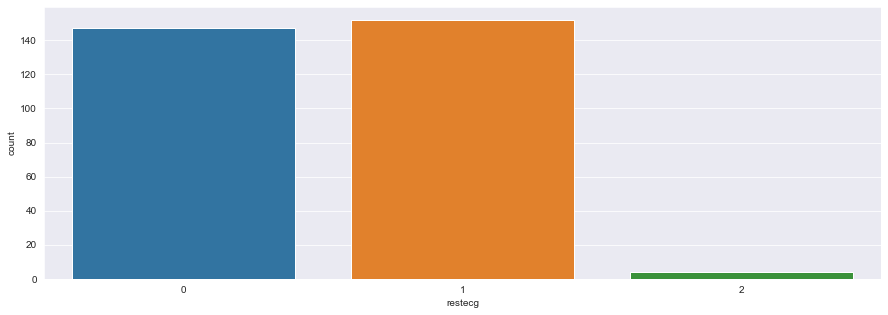

In [77]:
ax = sns.countplot(x=heart_data['restecg'])

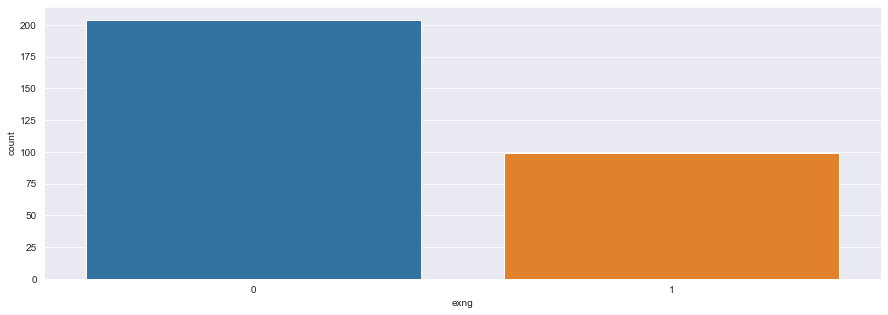

In [78]:
ax = sns.countplot(x=heart_data['exng'])

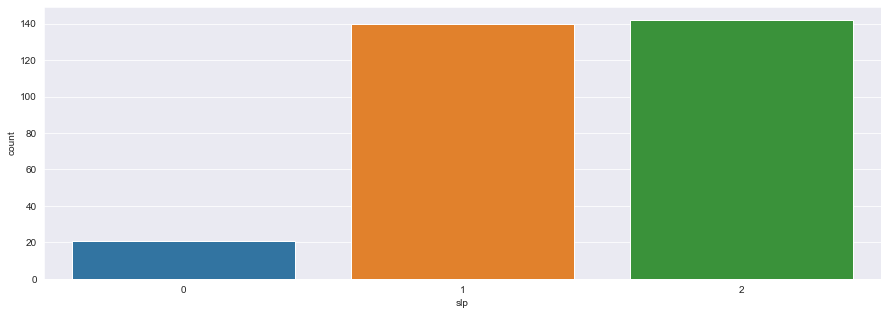

In [79]:
ax = sns.countplot(x=heart_data['slp'])

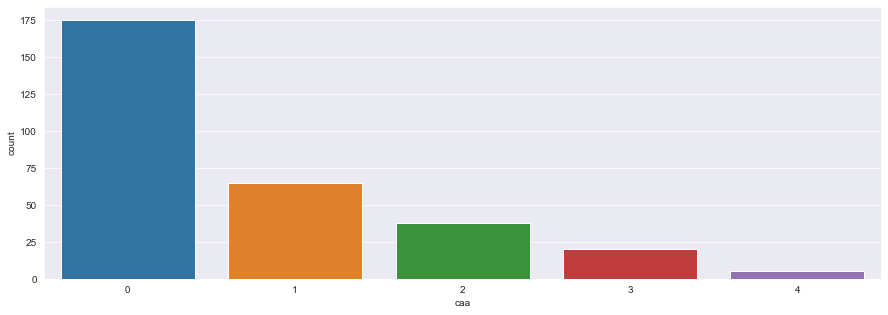

In [80]:
ax = sns.countplot(x=heart_data['caa'])

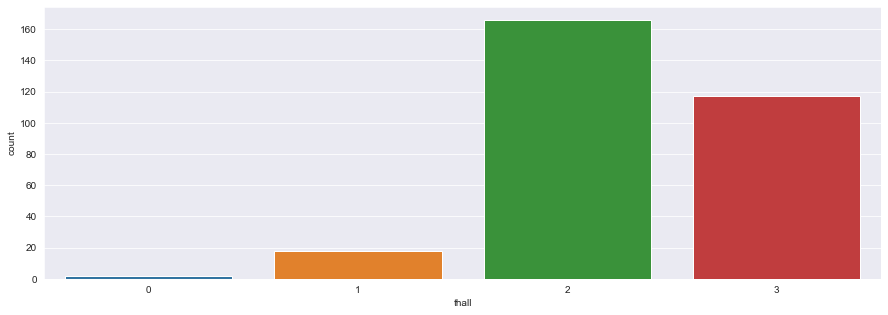

In [81]:
ax = sns.countplot(x=heart_data['thall'])

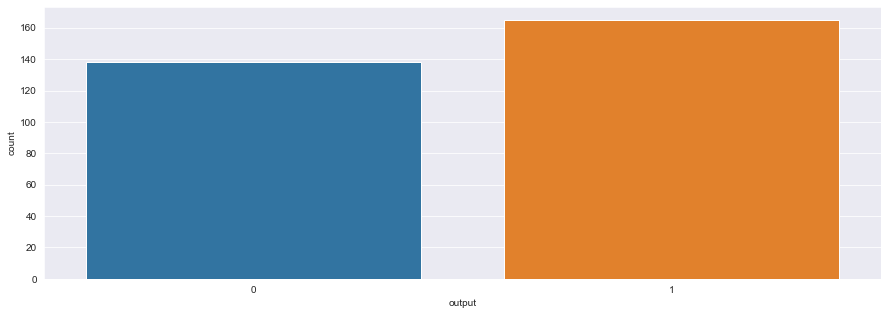

In [82]:
ax = sns.countplot(x=heart_data['output'])

These categorical variables range from very balanced to not balanced at all. I would consider sex, exng, and output to be balanced enough. And cp, fbs, restecg, slp, caa, and thall to be relatively unbalanced.<br>

Restecg is very balanced if you only consider values 0 and 1 but has a massive difference in the number of observations of value 2. Slp is similar though to not as large of an extent.<br>

Caa seems to follow a nice logarithmic curve as you go from 0 to 4<br>

and finally Thall has a good number of observations for 2 and 3 but few for 1 and only a couple for 0

## Step 4
---

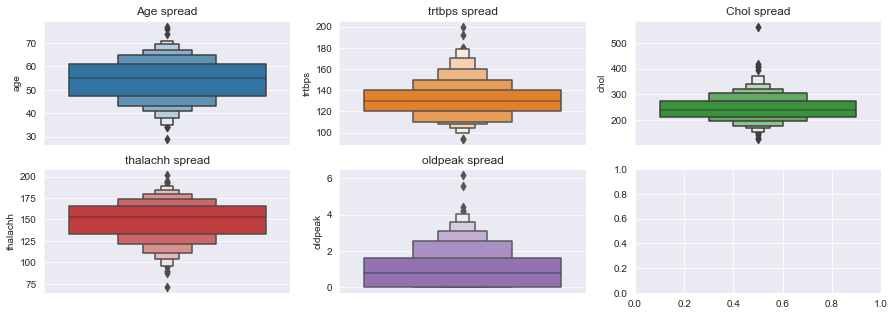

In [95]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 5))

sns.boxenplot(y=heart_data['age'], ax=axes[0][0])
axes[0][0].set_title('Age spread')

sns.boxenplot(y=heart_data['trtbps'], color='tab:orange', ax=axes[0][1])
axes[0][1].set_title('trtbps spread')

sns.boxenplot(y=heart_data['chol'], color='tab:green', ax=axes[0][2])
axes[0][2].set_title('Chol spread')

sns.boxenplot(y=heart_data['thalachh'], color='tab:red', ax=axes[1][0])
axes[1][0].set_title('thalachh spread')

sns.boxenplot(y=heart_data['oldpeak'], color='tab:purple', ax=axes[1][1])
axes[1][1].set_title('oldpeak spread')

plt.show()

All of these plot had much more centralization than I expected, it seems like there is a good range for some of these values and somewhat little deviation (Cholesterol)<br>

Oldpeak values are almost all zero and one 

## Step 5
---

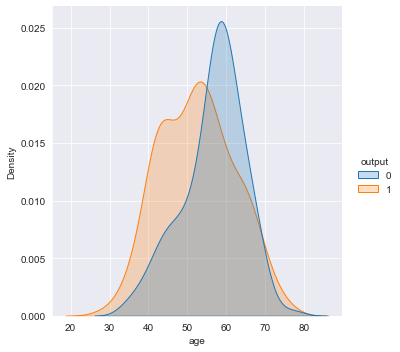

In [105]:
sns.displot(x=heart_data['age'], hue=heart_data['output'], kind='kde', fill=True)

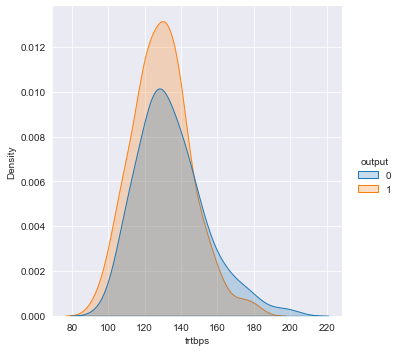

In [106]:
sns.displot(x=heart_data['trtbps'], hue=heart_data['output'], kind='kde', fill=True)

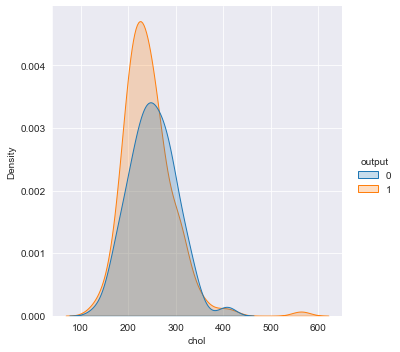

In [107]:
sns.displot(x=heart_data['chol'], hue=heart_data['output'], kind='kde', fill=True)

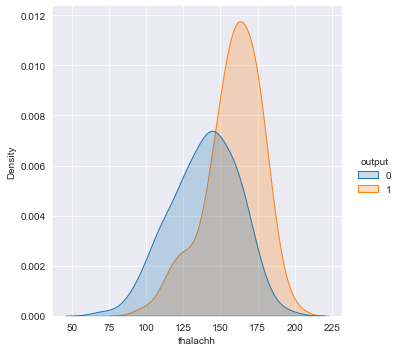

In [109]:
sns.displot(x=heart_data['thalachh'], hue=heart_data['output'], kind='kde', fill=True)

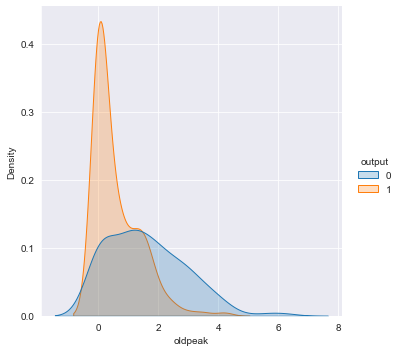

In [110]:
sns.displot(x=heart_data['oldpeak'], hue=heart_data['output'], kind='kde', fill=True)

From these plots it seems that the continuous variables that contribute most to outcome are age, thalachh, and oldpeak 

## Step 6
---

<AxesSubplot:>

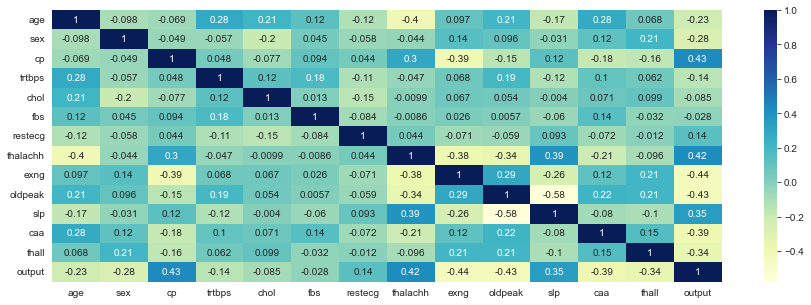

In [117]:
sns.heatmap(heart_data.corr(), annot=True, cmap='YlGnBu')

There does not appear to be a significant level of correlation between any two attributes. The highest is between chest pain and output which is only 0.43. This also means that there is no significant multicollinearity

## Step 7
---

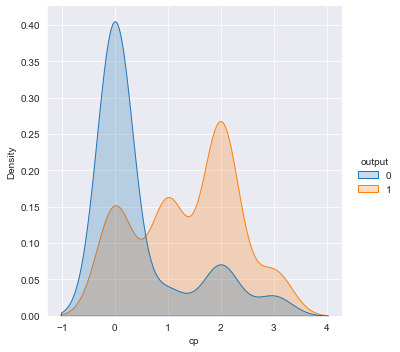

In [118]:
sns.displot(x=heart_data['cp'], hue=heart_data['output'], kind='kde', fill=True)

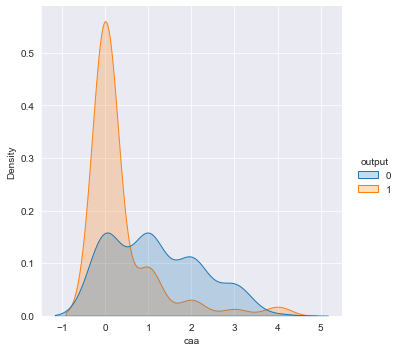

In [119]:
sns.displot(x=heart_data['caa'], hue=heart_data['output'], kind='kde', fill=True)

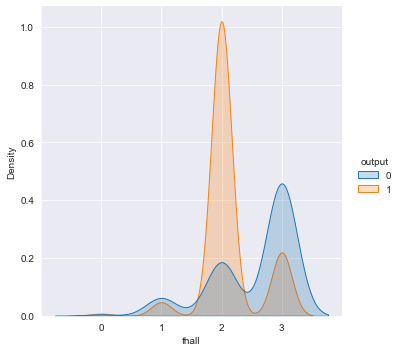

In [120]:
sns.displot(x=heart_data['thall'], hue=heart_data['output'], kind='kde', fill=True)

Of these categorical variables it seems that higher values of cp would be a good indicator of outcome (1,2,3)

<AxesSubplot:xlabel='age', ylabel='cp'>

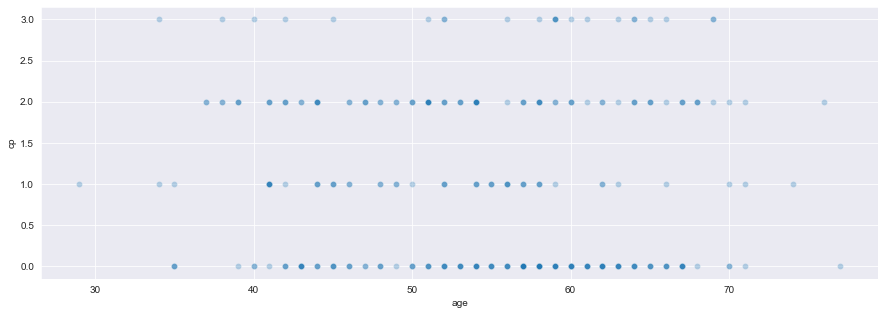

In [123]:
sns.scatterplot(x='age', y='cp', data=heart_data, alpha=0.3)

We can see that chest pain type does not seem to directly correlate with any particular age range

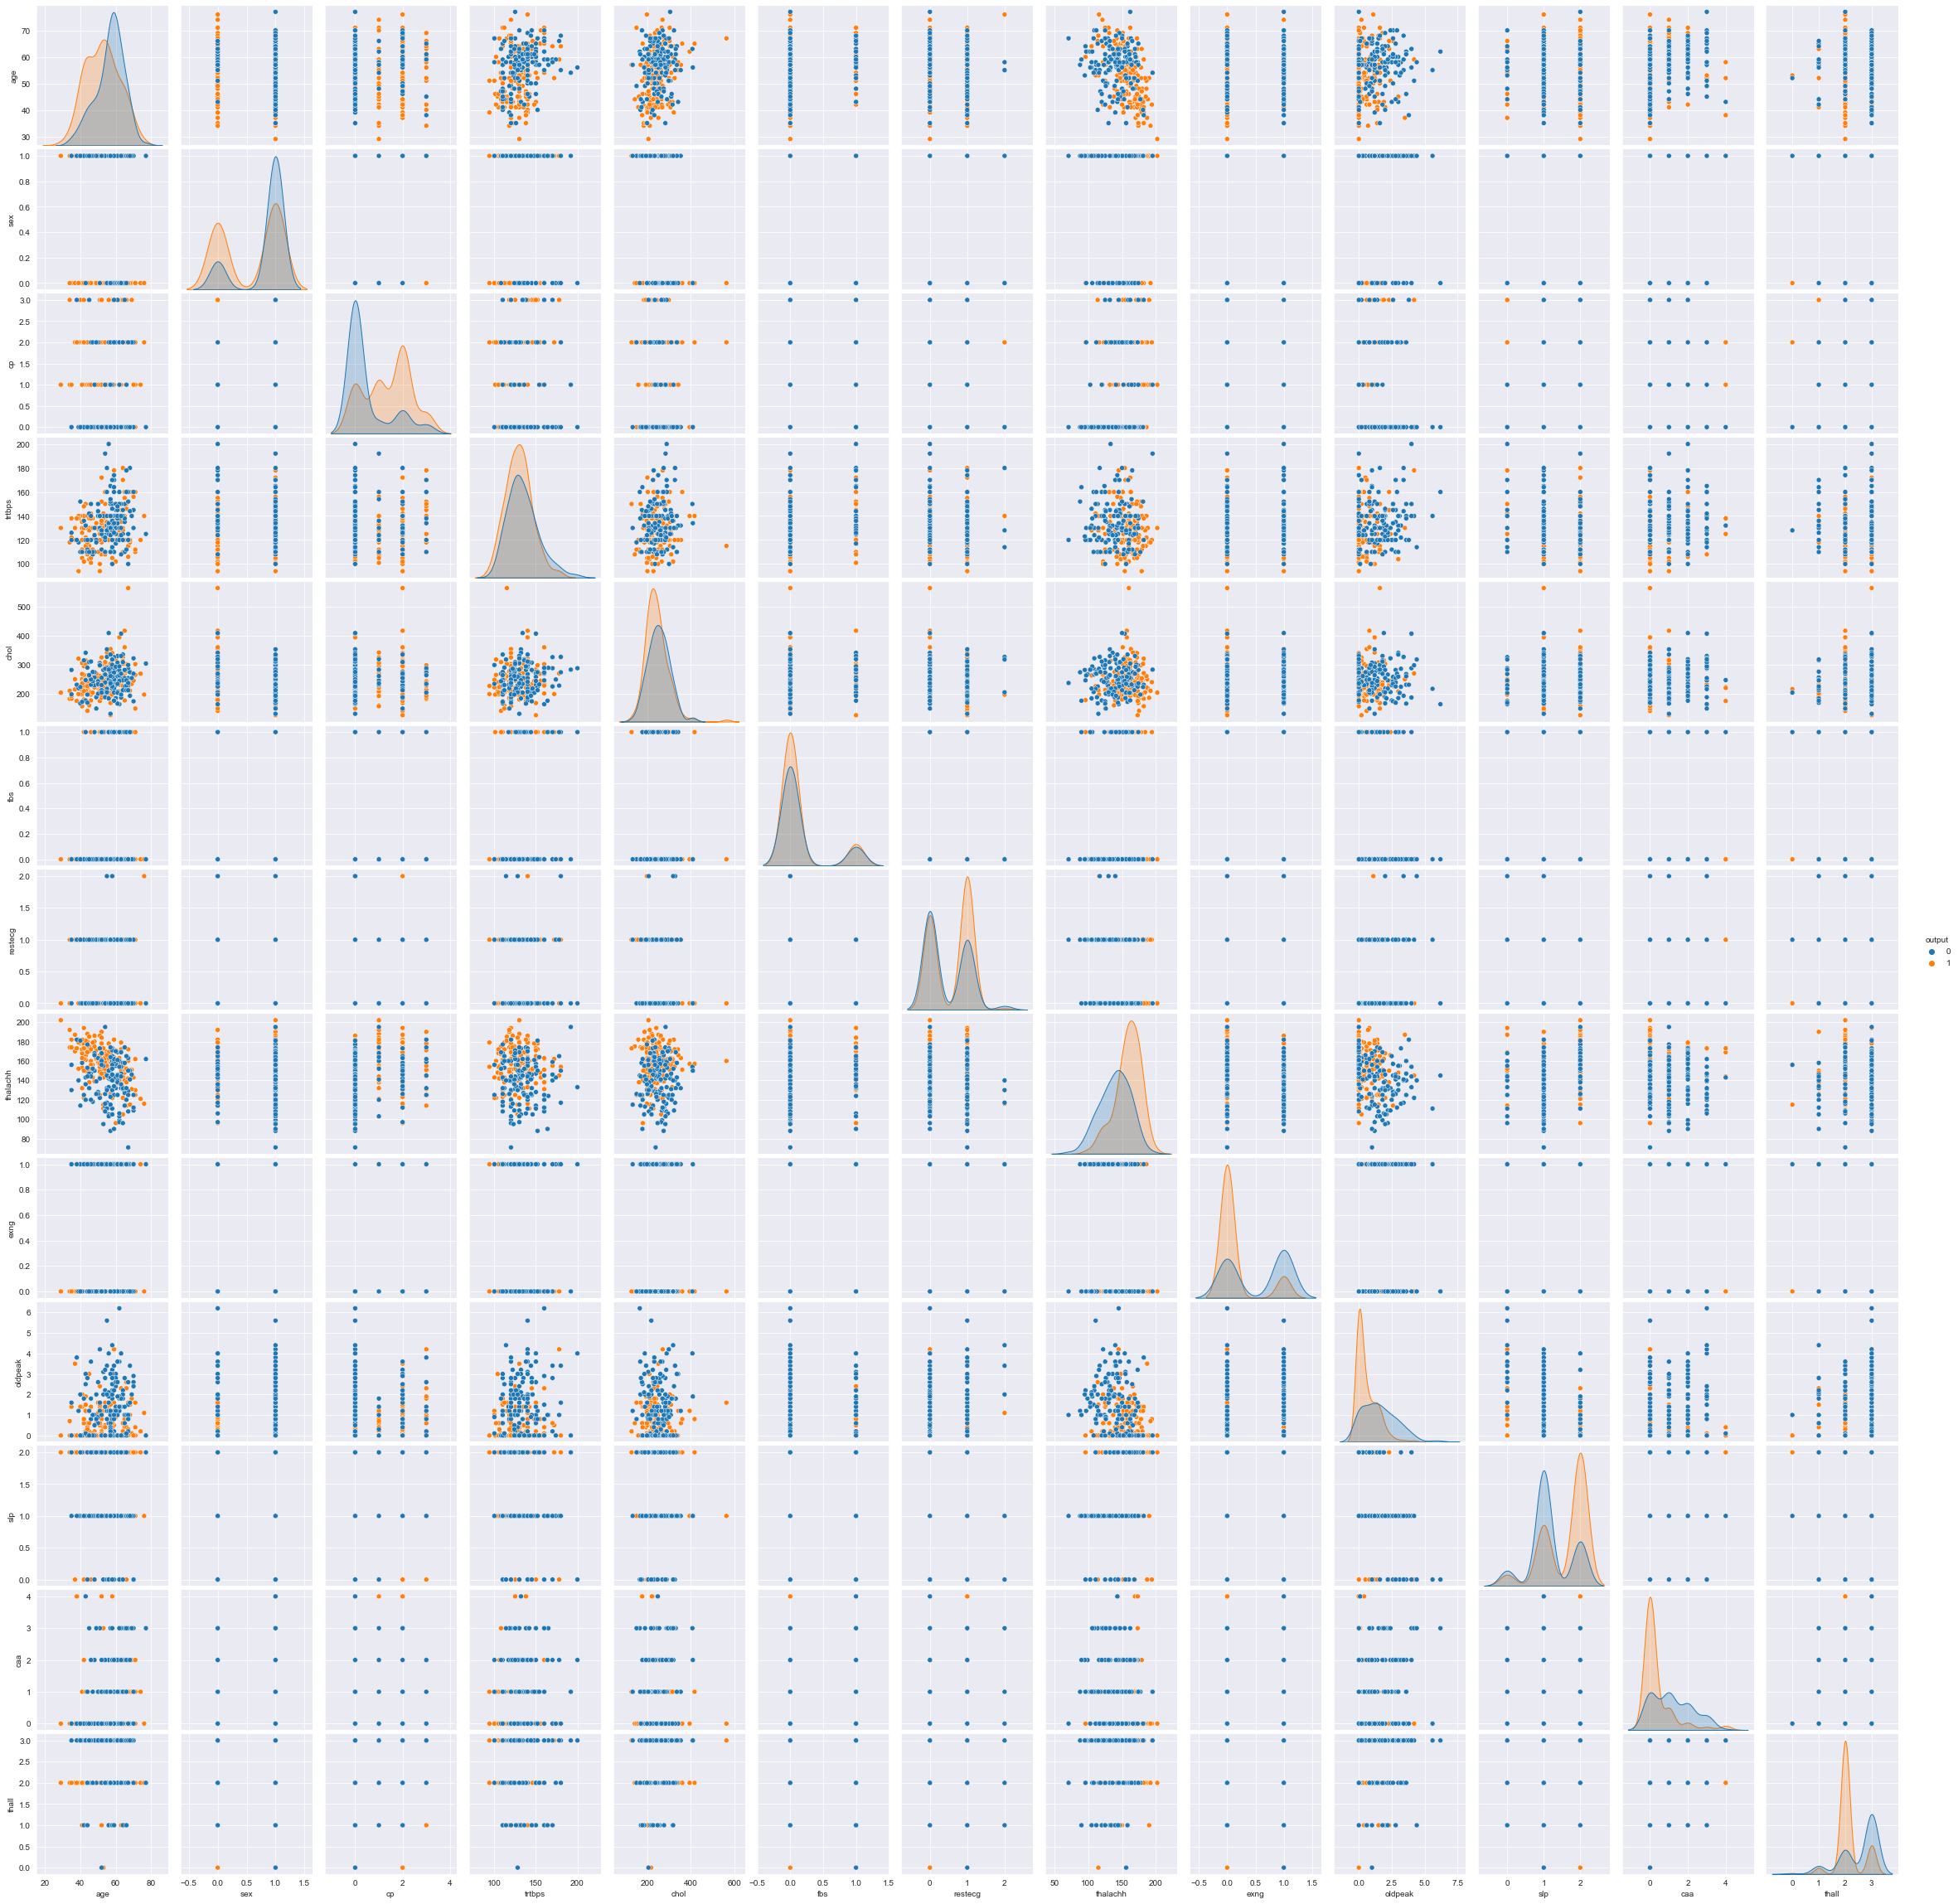

In [128]:
sns.pairplot(heart_data, hue='output')

Generally in this dataset it seems that no 1 attribute is generally good at categorizing the outputs

## Step 8
---

We can use logistic regression, k-nearest neighbors, naive bayes, decision trees, and plenty more.<br>

Label encoding assigns each individual option an integer value in order. ie, good better best becomes 1 2 3. This is useful when there is an inherent order to the categorical data. Doesn't work well if the attribute options have no order.<br>

One-hot encoding or dummy encoding splits out each categorical attribute into n columns where n is the number of unique options in that category. Each of these n new columns is a binary value representing if that row belongs to the respective category. This is useful when the categories are not ordered or ranked.<br>

Multicollinearity is when two or more independent variables in the data set are correlated to each other. This can cause error in your predictions and lead to skewed models drawing relationships the collinearity. This should be avoided if at all possible. We can check for multicollinearity by using .corr() on the dataframe. An easy way to visualize it is stated above as sns.heatmap(heart_data.corr(), annot=True, cmap='YlGnBu'). <br>

Scaling data is needed because attributes in the real world often come in many different scales. Certain attributes are on a scale of 0-1 or 1-5 where others are from 0-100 or in the thousands or millions. Computing models with data like this will lead to heavy skewing towards the larger scale variables and the effect of the small scale attributes will be negligible. Scaling the data allows all attributes to be considered fairly regardless of their original scale.<br>

Logistic regression is a parametric algorithm. K-nearest neighbors is non-parametric. Parametric models assume there is a finite number of parameteres that can be found such that the model perfectly fits the data. Non-parametric operates without this assumption, there aren't parameters to be found.<br>

Two of the most common ways of dealing with missing data is imputation and dropping. The simpler of the two is dropping, if there is a large amount of missing data just don't use that column in your model it will lead to bad results. Imputation is a method of filling in the midding data using a variety of different methods. The most common method is to fill in empty spots with the mean or average of that column

## Step 9 part 1: k-nearest neighbors
---

In [133]:
# K-nearest neighbors
from sklearn.preprocessing import StandardScaler

# all columns except 'output'
X = heart_data.drop('output', axis=1)
y = heart_data['output']

# create our scaler object
scaler = StandardScaler()
# use our scaler object to transform/scale our data and save it into X_scaled
X_scaled = scaler.fit_transform(X)
# reassign X to a new DataFrame using the X_scaled values.
X = pd.DataFrame(data=X_scaled, columns=X.columns)

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [135]:
from sklearn.neighbors import KNeighborsClassifier

# will append scores here for plotting later
test_scores = []
train_scores = []

# testing k values from 1-14
for i in range(1,15):
    # create a model with k=i
    knn = KNeighborsClassifier(i)
    # train the model
    knn.fit(X_train,y_train)
    
    # append scores. 
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

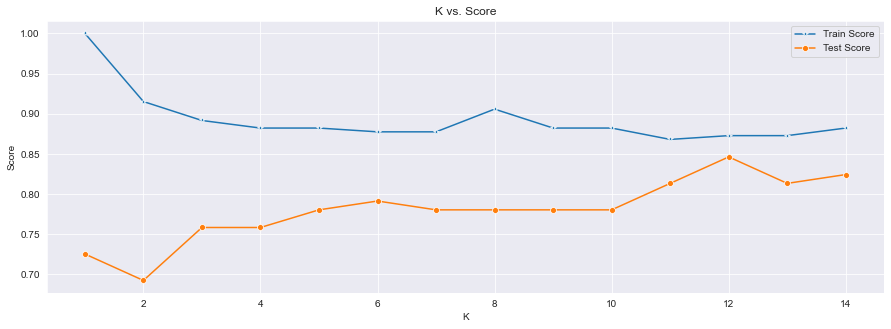

In [136]:
sns.lineplot(x=range(1,15), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1,15), y=test_scores, marker='o', label='Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

In [137]:
test_scores = []
train_scores = []

# testing k values from 1-100
for i in range(1,101):
    # create a model with k=i
    knn = KNeighborsClassifier(i)
    # train the model
    knn.fit(X_train,y_train)
    
    # append scores. 
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

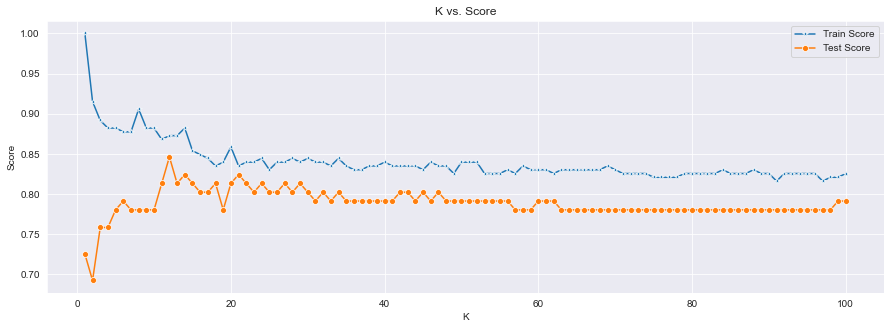

In [138]:
sns.lineplot(x=range(1,101), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1,101), y=test_scores, marker='o', label='Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

In [139]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8131868131868132

In [140]:
max = knn.score(X_test,y_test)

for i in range(1,101):
    knn = KNeighborsClassifier(i)

    knn.fit(X_train,y_train)
    if knn.score(X_test,y_test) > max:
        print(i)
        max = knn.score(X_test,y_test)

print(max)

12
0.8461538461538461


In [141]:
knn = KNeighborsClassifier(12)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8461538461538461

In [142]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        41
           1       0.83      0.90      0.87        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91

[[32  9]
 [ 5 45]]


## Step 9 part 2: Logistic Regression
---

In [147]:
# K-nearest neighbors
from sklearn.preprocessing import StandardScaler

# all columns except 'output'
X = heart_data.drop('output', axis=1)
y = heart_data['output']

# create our scaler object
scaler = StandardScaler()
# use our scaler object to transform/scale our data and save it into X_scaled
X_scaled = scaler.fit_transform(X)
# reassign X to a new DataFrame using the X_scaled values.
X = pd.DataFrame(data=X_scaled, columns=X.columns)

In [148]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [149]:
predictions = logmodel.predict(X_test)

In [150]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79        50
           1       0.71      0.90      0.80        41

    accuracy                           0.79        91
   macro avg       0.80      0.80      0.79        91
weighted avg       0.81      0.79      0.79        91

[[35 15]
 [ 4 37]]


## Step 9 part 3: Decision tree
---

In [152]:
# K-nearest neighbors
from sklearn.preprocessing import StandardScaler

# all columns except 'output'
X = heart_data.drop('output', axis=1)
y = heart_data['output']

# create our scaler object
scaler = StandardScaler()
# use our scaler object to transform/scale our data and save it into X_scaled
X_scaled = scaler.fit_transform(X)
# reassign X to a new DataFrame using the X_scaled values.
X = pd.DataFrame(data=X_scaled, columns=X.columns)

In [153]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [154]:
# predict the test set results with criterion gini index
y_pred_gini = clf_gini.predict(X_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.6813


In [155]:
y_pred_train_gini = clf_gini.predict(X_train)
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9292
Test set score: 0.6813


The high training score and low testing score means overfitting

In [156]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

y_pred_gini = clf_gini.predict(X_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7363


In [158]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_entropy.fit(X_train, y_train)

y_pred_entropy = clf_entropy.predict(X_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_entropy)))

Model accuracy score with criterion entropy index: 0.7692


In [159]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

# fit the model
clf_entropy.fit(X_train, y_train)

y_pred_entropy = clf_entropy.predict(X_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_entropy)))

Model accuracy score with criterion entropy index: 0.7692


In [160]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [161]:
rfc_pred = rfc.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, rfc_pred)))

Model accuracy score: 0.8242


I ended up testing a third model, decision tree because I was curious about how it would compare with the others. Overall my k-nearest neighbor model was the most accurate at 85% testing, followed by logistic regression at 79% and finally decision tree at a peak of 77% with the entropy method. I used standard scaler on my data because I didn't want the larger variables like age to outweight the smaller items. One later addition I made was the inclusion of a random forest decision tree which bumped the accuracy up to 82% a big improvement over the other methods<br>

One notable thing I found was that the decision tree with the gini critera was severely overfit and thus had a very high training score (93%) but fell short in testing at only 68%.

I chose linear regression becuase we've discussed it a lot in class and how it is good at predicting binary variables based on non binary independent variables which is exactly what we have here with the binary output and non binary attributes.<br>

I chose k-nearest neighbor because I thought it would be a good choice for allowing me to optimize the model by finding the best k value and maximizing the score rather than just a stationary model. It's also a very simple way of classification and doesn't rely on any complex formulas.<br>

Finally I chose decision trees because we've discussed them at length and how they benefit from high purity, low entropy nodes which we don't really have much of in this dataset.<br>